<h2><b>Applied Data Science Capstone Project</b></h2>
<h1>The Battle of the Neighborhoods</h1>
<h3>**by Sid with IBM/Coursera**</h3><a id="home"></a>
<p style="text-align: right"><b>LinkedIn  </b><a href="https://www.linkedin.com/in/sidhartha-mitra-91b3253"> : Direct Link</a></p>
<p style="text-align: right"><b>GitHub  </b><a href="https://github.com/InwithSid/Coursera_Capstone"> : Direct Link</a></p>

<h2 style="text-align:center">Table of contents</h2>
 <table style="width:50%" align="center">
  <tr>
    <th style="text-align:center">S.No.</th>
    <th style="text-align:center">Chapter</th>
    <th style="text-align:center">Topic</th>
    </tr>
  <tr>
    <td style="text-align:center">1.</td>
    <td style="text-align:center"><b>The Problem</b></td>
    <td style="text-align:center"><a href="#introduction">Introduction and Problem statement</a></td>
  </tr>
  <tr>
    <td style="text-align:center">2.</td>
    <td style="text-align:center"><b>Data</b></td>
    <td style="text-align:center"><a href="#data">Data Sources and Setup</a></td>
  </tr>
    <tr>
    <td style="text-align:center">3.</td>
    <td style="text-align:center"><b>Analysis</b></td>
    <td style="text-align:center"><a href="#analysis">Computation of best neighborhood</a></td>
  </tr>
    <tr>
    <td style="text-align:center">4.</td>
    <td style="text-align:center"><b>Result and Discussion</b></td>
    <td style="text-align:center"><a href="#results">Findings and the model</a></td>
  </tr>
    <tr>
    <td style="text-align:center">5.</td>
    <td style="text-align:center"><b>Conclusion</b></td>
    <td style="text-align:center"><a href="#conclusion">Sharing the outcomes and feed-forward</a></td>
  </tr>
</table>



## The Problem Statement <a id="introduction"></a>
<p align="right"><a href="#home">Home</a></p>


<p>In this project we are going to try to action and achieve the following outcomes,<br>1. Choose (<b>based on their crime%</b>) one city out of the two cities(New York or Toronto) which should get a <b>'Mental-Health Welness Care Unit'</b> <br>2. Based on the choice of city finding out the best location to set up a 'Mental-Health Welness Care Unit' <b>which will be at the centroid of major neighborhood clusters of the New York city.</b>
<br>For this project it is important that a <b>location</b> is selected that is located at the centroid of the the neighborhoods that are higher in their average <b> crime rate </b>, when compared with the other neighborhoods.
<b>Data Science methodologies</b> will be used <b>to generate a few most promising neighborhoods</b> based on the above mentioned criteria, and <b>estimate the best possible location to set up a 'Mental-Health Welness Care Unit'</b>
Top 3 locations will then be clearly expressed so that best possible final location can be chosen by stakeholders.

## Data <a name="data"></a>
<p><a href="#home">Home</a></p>

Based on the problem statement, factors that will influence our decission are:
* Selection of the cities (between |New York||Toronto|)based on the crieteria of higher annual crime rate in these cities,
    * Source of crime comparison data between Toronto and New York : https://www.numbeo.com/crime/
* After city selection, we need to find out the best location i.e. at the center of the neighborhoods of the selected city for analysis
    * coordinate of the 'selected city' will be obtained using **Google Maps API geocoding**
* Finally identifying three localities to be proposed to the stakeholders to choose one
    * The latitude and longitude data for the three locations will be obtained from :  

We decided to use regularly spaced grid of locations, centered around city center, to define our neighborhoods.

Following data analysis and representation tasks are to be accomplished during this phase:
* D1.0 - Importing and parsing crimes data from numbeo to represent the comparision 
* D1.1 - Visualizing and storing the comparison data
* D2.0 - Downloading, cleaning and exploring the dataset for neighborhoods of our selected city
### D1.0
#### Importing and parsing 'Crimes Data' from the numbeo website & parsing it into a representation.

<p>The <b>numbeo</b> website has been around since 2010 and it's been a source to many international
newspapers and magazines for unbaised data sets of various gerenes.
We are currently focused on retrieving<br>the crimes data for two cities, Toronto and New York.

<p> 1.0.1 We'll be using the beautiful soup package to first pharse the webpage for our data</p>

In [32]:
#importing the libraries
import requests
from bs4 import BeautifulSoup

#Assigning the url to a variable
url = "https://www.numbeo.com/crime/compare_cities.jsp?country1=Canada&city1=Toronto&country2=United+States&city2=New+York%2C+NY"

#fetching data through request
page=requests.get(url)
soup = BeautifulSoup(page.text,'html.parser')

#finding our element in the page source code called table_indices
review_txt = soup.find_all(class_='table_indices')

<p> 1.0.2 Testing the raw fetched data from the source </p>

In [33]:
review_txt

[<table class="table_indices">
 <tr><th>Index   <a href="https://www.numbeo.com/crime/indices_explained.jsp" title="About these indices"><img alt="Info" class="image_help" src="https://www.numbeo.com/images/information.png"/></a></th><th>Toronto</th><th>New York, NY</th></tr>
 <tr><td>Crime Index: </td>
 <td style="text-align: right">
    38.46</td>
 <td style="text-align: right">
    44.50</td>
 </tr>
 <tr><td>Safety Scale: </td>
 <td style="text-align: right">
    61.54</td>
 <td style="text-align: right">
    55.50</td>
 </tr>
 </table>]

<p> 1.0.3 Exporting this data to pandas </p>

In [34]:
#importing libraries
import pandas as pd
from tabulate import tabulate
# assigning the parsed data into a dataframe
df = pd.read_html(str(review_txt))

### D1.1
#### Visualizing and storing the comparison data for the two cities based on their crime index and safety scale.

In [35]:
# visualizing the dataframe by using tabulate
print( tabulate(df[0], headers='keys', tablefmt='psql') )

+----+---------------+-----------+----------------+
|    | Index         |   Toronto |   New York, NY |
|----+---------------+-----------+----------------|
|  0 | Crime Index:  |     38.46 |           44.5 |
|  1 | Safety Scale: |     61.54 |           55.5 |
+----+---------------+-----------+----------------+


<p> It is clearly visible from the above table that <b>'New York'</b> city should be the one to get the <b>Mental-Health Welness Care Unit</b> as it 
    satisfies the crieteria of higher crime rate when compared with Toronto.
<p> Hence, we recommend that <b>New York</b> city should be considered for our further investigation and analysis.</p>

## Methodology <a name="methodology"></a>

<p> As learned from the 'Data' chapter, 'New York' should be considered for further research in order to accomplish the goal.
    We now use the following libraries to analyse and visualize the data from the "https://cocl.us/new_york_dataset" website (New York, borough +
    neighborhood data )
    <b>pandas, requests, matplotlib, sklearn</b> and <b>folium</b>.
<p> Importing the libraries now...
        

In [40]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 


# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


<p> Downloading New York data from the <b>cocl.us</b> website</p>

In [45]:
!wget -q -O 'nyu_2451_34572-geojson.json' https://cocl.us/new_york_dataset
print('New York Data is now downloaded!')
with open('nyu_2451_34572-geojson.json') as json_data:
    newyork_data = json.load(json_data)
    #newyork_data #uncomment this line if you want to visualize the raw downloaded data

New York Data is now downloaded!


having a sneak peak into the first element.

In [44]:
neighborhoods_data = newyork_data['features']
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

Saving the <b>json file into a pandas dataframe<b>

In [4]:
with open('nyu_2451_34572-geojson.json') as json_data:
    newyork_data = json.load(json_data)
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [5]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

<p> Having a look at the data frame with <b>Borough, Neighborhood and Latitude, Longitude data </b>for the New York city.</p>

In [6]:
neighborhoods.head(15)

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


In [7]:
neighborhoods.shape

(306, 4)

<p> Plotting the coordinates on the map of New York to visualize the data points</p>

In [9]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='green',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

## Analysis <a name="analysis"></a>
<p><a href="#home">Home</a></p>

<p> Creating a new dataframe with only the Latitude and Longitude data. </p>

In [10]:
neighborhood_ll = neighborhoods.drop(["Borough","Neighborhood"],axis=1)
neighborhood_ll.head()

,Latitude,Longitude
0,40.894705,-73.847201
1,40.874294,-73.829939
2,40.887556,-73.827806
3,40.895437,-73.905643
4,40.890834,-73.912585


<p> <b>converting the dataframe into arrays x1 and x2</b>, also plotting it on a <b>scatter to visualize the clusters</b>.</p>

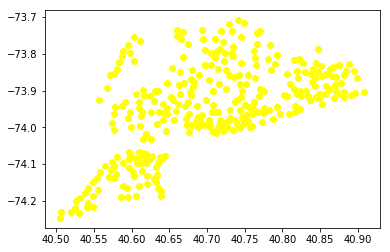

In [12]:
x1 = neighborhood_ll["Latitude"].tolist()#assigning column data to arrays x1 & x2
x2 = neighborhood_ll["Longitude"].tolist()
#print('Datapoints defined!')
plt.plot(x1, x2, 'o', color='yellow');

<p> Using <b>K-Means clustering algoritham to estimate the coordinates of 3 centroids which are in the center of 3 major neighborhood clusters of 
    the New York city</b>.</p>

In [13]:
Y= np.concatenate((x1,x2), axis=0)
y = Y.reshape(-1, 1)
k_means = KMeans(init = "k-means++", n_clusters = 6, n_init = 18)
k_means.fit(y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=18, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
k_means_labels = k_means.labels_
k_means_labels

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 1, 5, 5, 5, 5, 5, 1, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 1, 1,
       1, 1, 1, 5, 5, 5, 5, 1, 1, 1, 5, 5, 1, 4, 4, 4, 4, 4, 4, 1, 1, 1,
       1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 1, 4, 4,
       5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 1, 1, 1, 1, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 4, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1,
       1, 1, 1, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5,
       5, 5, 5, 5, 1, 5, 5, 5, 4, 1, 5, 4, 4, 4, 5,

In [15]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-73.80247561],
       [ 40.71304632],
       [-73.93875612],
       [-74.13741406],
       [ 40.84447347],
       [ 40.59196847]])

In [27]:
print("Hence the three centroids are identified!")
B = np.reshape(k_means_cluster_centers, (-1, 2))
df4= pd.DataFrame(B)
df4

Hence the three centroids are identified!


,0,1
0,40.603787,-73.953155
1,-73.938756,-74.137414
2,40.719572,-73.824671


<p> We have the <b>3 location coordinates</b> are found as the centrally <b>located</b> within <b>3 major neighborhood clusters of the New York city</b>.</p>

## Results and Discussion <a name="results"></a>
<p><a href="#home">Home</a></p>

<h4> From the 'Analysis' excercise we were able to find the coordinates of 3 centroids which are in the center of 3 major neighborhood clusters of the New York city.</h4>
<p> Rearrenging the coordinates into a new dataframe.</p>

In [28]:
#rearrenging the elements in the df
df4.at[0, 0] = 40.603787
df4.at[1, 0] = 40.833642
df4.at[0, 1] = -74.134149
neighborhood_lln = df4
#neighborhood_lln = df4.drop([2],axis=1)
neighborhood_lln.columns = ["Latitude", "Longitude"]
neighborhood_lln

,Latitude,Longitude
0,40.603787,-74.134149
1,40.833642,-74.137414
2,40.719572,-73.824671


<p> Plotting the <b>discovered locations</b> on the <b>map of New York</b> to visually observe the coordinates of 3 centroids which are in the center of 3 major neighborhood clusters of the New York city.</p>

In [29]:
# creating a new map of new york with the proposed coordinates
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng in zip(neighborhood_lln['Latitude'], neighborhood_lln['Longitude']):
    label = '{}, {}'.format(neighborhood_lln, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='green',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

## Conclusion <a name="conclusion"></a>
<p><a href="#home">Home</a></p>

<h4> From this project we were able to discover the following coordinates of 3 centroids which are in the center of 3 major neighborhood clusters of the New York city.<h4>

In [46]:
neighborhood_lln

,Latitude,Longitude
0,40.603787,-74.134149
1,40.833642,-74.137414
2,40.719572,-73.824671


<h4 style="text-align:left">These location names are :</h4>
 <table style="width:50%" align="left">
  <tr>
    <th style="text-align:center">S.No.</th>
    <th style="text-align:center">Location Name</th>
    </tr>
  <tr>
    <td style="text-align:center">1.</td>
    <td style="text-align:center"><b>17 Fillmore Ave, Staten Island, NY 10314, USA</b></td>
    </tr>
  <tr>
    <td style="text-align:center">2.</td>
    <td style="text-align:center"><b>131 William St, Clifton, NJ 07014, USA</b></td>
    </tr>
    <tr>
    <td style="text-align:center">3.</td>
    <td style="text-align:center"><b>135-20 78th Ave, Flushing, NY 11367, USA</b></td>
  </tr>

<p> Hence, we propose that the stake holder's can choose any of the above locations in <b>New York</b> to 
    have a <b>Mental-Health Welness Care Unit</b> in place, which will be at the centroid of major neighborhood clusters of the New York city.</p>